In [48]:
# pca- reducing 4 dimentional data into 2 dimentional
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np

In [49]:
# take iris dataset from sklearn
from sklearn import datasets
iris=datasets.load_iris()

In [50]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [51]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target

# Standardscaler and normalize the data

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Now create covariance martix

In [55]:
rows=X_scaled.T
covariance_matrix=np.cov(rows)

# Calculate the eigen values and eigen vectors

In [56]:
eig_val,eig_vec=np.linalg.eig(covariance_matrix)

In [57]:
for i in range(len(eig_val)):
    print(eig_val[i]/sum(eig_val))

0.7296244541329988
0.22850761786701773
0.036689218892828716
0.005178709107154775


# Project the datapoints on to the selected eigen values

In [72]:
PC1=X_scaled.dot(eig_vec.T[0])
PC2=X_scaled.dot(eig_vec.T[1])

In [76]:
# Compose a new dataframe for our new analysis
df=pd.DataFrame(PC1,columns=['PC1'])
df['PC2']=PC2
df['target']=y

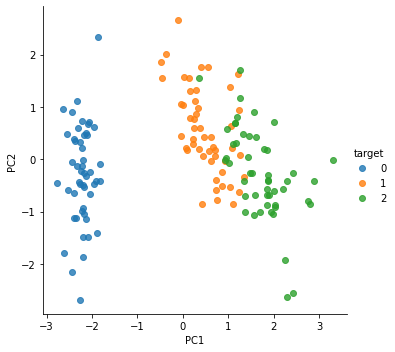

In [79]:
#Draw a plot with points
sns.lmplot(x='PC1',y='PC2',data=df,fit_reg=False,hue='target')

# importing pca

In [82]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
project_data=pca.fit_transform(X_scaled)

In [83]:
PC1=project_data[:,0]
PC2=project_data[:,1]

In [90]:
#creating the dataframe 
# then draw the plot
df1=pd.DataFrame(PC1,columns=['PC1'])
df1['PC2']=PC2
df1['target']=y
df1

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


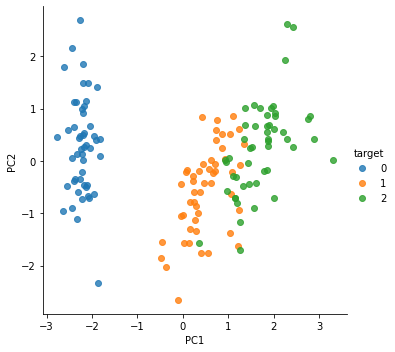

In [91]:
sns.lmplot(x='PC1',y='PC2',data=df1,hue='target',fit_reg=False)

In [92]:
df1=df1.drop('target',axis=1)

# Using PCA class in sklearn

In [95]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
project_data=pca.fit_transform(X_scaled)

In [96]:
PC1=project_data[:,0]
PC2=project_data[:,1]

In [97]:
#Create a dataframe and then draw the plot
df1=pd.DataFrame(PC1,columns=['PC1'])
df1['PC2']=PC2
df1['target']=y
df1


,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


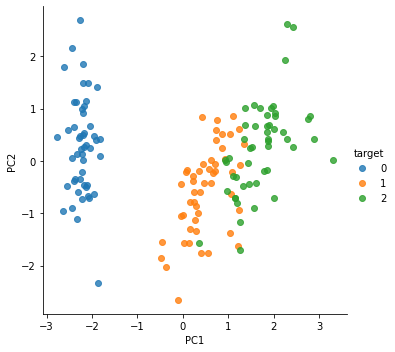

In [98]:
sns.lmplot(x='PC1',y='PC2',data=df1,hue='target',fit_reg=False)

In [99]:
#remove the target col and take remaining dtaframe
df1=df1.drop('target',axis=1)

# Train and Test

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df1,y,test_size=0.2)

In [104]:
# train the model using the SVM
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [105]:
#find the accuracy
model.score(X_test,y_test)

0.9333333333333333

In [106]:
input=np.array([[6.6,3.0,4.4,1.4]])

In [107]:
scaled=scaler.transform(input)

In [108]:
pca_input=pca.transform(scaled)

In [109]:
model.predict(pca_input)

array([1])